# EDA - Venta de Coches (USA)

<img alt = "ALT" src = "recursos_visuales/img1.jpeg">

### Instalación de Librerías básicas

In [2]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc


### Modelos
from xgboost import XGBClassifier, plot_importance

c:\Users\diego\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Cargamos el dataset desde el csv
df = pd.read_csv("Dataset/car_prices.csv")

In [5]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [8]:
len(df['model'].unique())

974

In [7]:
array_car_types = df['body'].unique()

print(len(array_car_types))

88


In [55]:
import math

def assign_color(value):
    # Convertir a mayúsculas para una comparación uniforme (opcional)
     #value = value.strip().lower()

    # Asignar valores a los colores
    if value in {'4802', '2846', '339', '20627', '12655', 'white'}:  # Verificar valor vacío en caso de NaN
        return int(1)  # blanco
    elif value in {'16633', '6158', '5705', '-', 'gray'}:
        return int(2)  # gris
    elif value in {'6388', 'black'}:
        return int(3)  # negro
    elif value in {'11034', 'red'}:
        return int(4)  # rojo
    elif value in {'2711', 'silver'}:
        return int(5)  # plata
    elif value in {'2817', 'blue'}:
        return int(6)  # azul
    elif value in {'9410', '1167', '14872', 'brown'}:
        return int(7)  # marrón
    elif value in {'9887', '2846', 'beige'}:
        return int(8)  # beige
    elif value in {'18561', '9562', '5001', 'purple'}:
        return int(9)  # púrpura
    elif value in {'721', '2711', 'burgundy'}:
        return int(10)  # burdeos
    elif value in {'gold', '2172'}:
        return int(11)  # oro
    elif value in {'yellow', '18384', '9837', '20379', '15719', '6864'}:
        return int(12)  # amarillo
    elif value == 'green':
        return int(13)  # verde
    elif value == 'charcoal':
        return int(14)  # carbón
    elif value == 'orange':
        return int(15)  # naranja

    return None

In [9]:
df['color_numeric'] = df['color'].apply(assign_color)

In [63]:
#Asignamos los valores NaN del parametro color_numeric, por el más comun de todo el conjunto osea 4

df['color_numeric'].fillna(4)


0         1.0
1         1.0
2         2.0
3         1.0
4         2.0
         ... 
558832    5.0
558833    1.0
558834    3.0
558835    1.0
558836    2.0
Name: color_numeric, Length: 558837, dtype: float64

In [10]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,color_numeric
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2.0


In [28]:
total_states = df["state"].unique()

print(total_states)

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'pr' 'or' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' '3vwd17aj4fm201708' 'ns'
 '3vwd17aj2fm258506' '3vwd17aj3fm276741' '3vwd17aj2fm285365'
 '3vwd17aj0fm227318' '3vwd17aj6fm218641' '3vwd17aj7fm223475'
 '3vwd17aj5fm297123' '3vwd17aj5fm219943' '3vwd17aj9fm219766'
 '3vwd17aj3fm259017' '3vwd17aj5fm206111' '3vwd17aj5fm273601'
 '3vwd17aj5fm221322' '3vwd17aj5fm268964' '3vwd17aj6fm231972'
 '3vwd17aj7fm222388' '3vwd17aj7fm218440' '3vwd17ajxfm315938'
 '3vwd17aj7fm229552' '3vwd17aj8fm298895' '3vwd17aj4fm236636'
 '3vwd17aj5fm225953' '3vwd17aj7fm326640' '3vwd17aj8fm239622'
 '3vwd17aj2fm261566']


In [29]:
#Creamos un array con los estados ya sean de EEUU, CA o PR validos en la columna state
array_states = ['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj', 'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut', 'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on', 'ok', 'ms', 'nm', 'al']

#Obviamos el resto de valores ya que no refieren a ningun lugar geografico

print(len(array_states))

37


In [34]:
#A continuacion vamos a referencia cada estado con un numero del 0 al 37. Siendo el 0 para aquellos valores que no refieren a ningun estado válido

def assing_state(value):
    if value not in array_states:
        return int(0) #Devolvemos 0 para aquellos que no esten en el array de estados
    elif value in array_states:
        counter = 1
        for state in array_states: 
            if state == value:
                return int(counter)
            else:
                counter += 1

In [41]:
#Aplicamos a la columna de 'state' nuestra funcion y revisamos que todo este correcto

df['states_numeric'] = df['state'].apply(assing_state)

df['states_numeric'].describe()

count    558837.000000
mean         10.243890
std           7.828328
min           0.000000
25%           3.000000
50%           9.000000
75%          15.000000
max          37.000000
Name: states_numeric, dtype: float64

Como podemos observar tiene valores del 0 al 37 como bien habíamos planteado anteriormente

## Creamos un DataFrame con los datos que vamos a usar


In [66]:
cars = df[['year','condition','odometer','color_numeric','states_numeric','mmr','sellingprice']]

In [67]:
cars.describe()

,year,condition,odometer,color_numeric,states_numeric,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558837.000000,558837.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,3.870198,10.243890,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,2.712219,7.828328,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,1.000000,0.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,2.000000,3.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,3.000000,9.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,5.000000,15.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,15.000000,37.000000,182000.000000,230000.000000


In [69]:
target = 'sellingprice'
car_features = list(cars.columns)

car_features.remove(target)
print(car_features)

['year', 'condition', 'odometer', 'color_numeric', 'states_numeric', 'mmr']


### Análisis univariante

Como podemos observar no tenemos valores 0 en ninguna columna a excepcion de la columna de 'states_numeric', dado que esta hace referencia a coche donde el estado asignado no es válido.

In [70]:
cars.drop(target, axis = 1).isin([0]).sum()

year               0
condition          0
odometer           0
color_numeric      0
states_numeric    87
mmr                0
dtype: int64

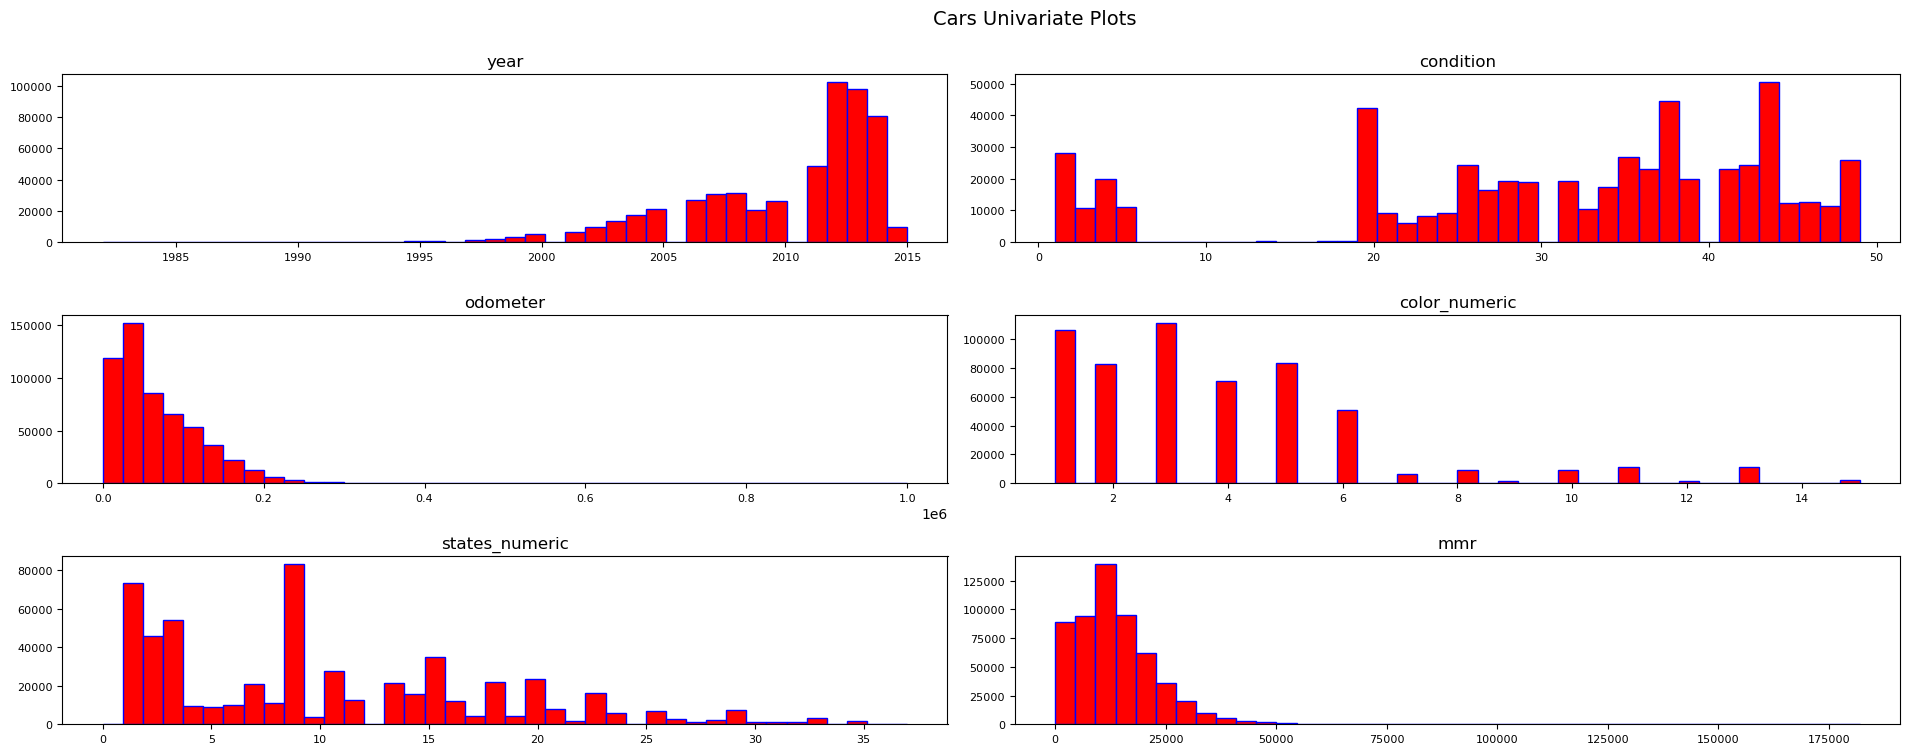

In [71]:
cars[car_features].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Cars Univariate Plots', x=0.65, y=1.25, fontsize=14);  

### Distribución de los precios de venta

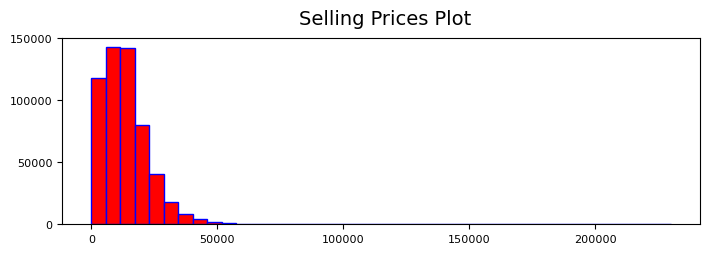

In [72]:
cars[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Selling Prices Plot', x=0.65, y=1.25, fontsize=14);  

### Análisis multivariante